In [ ]:
                                   # Healthcare Data Analysis – Project 2

## Objective
Analyze healthcare data to understand:
- Patient statistics
- Treatment outcomes
- Hospital performance metrics

This project focuses on exploratory data analysis (EDA) and visualization
to extract actionable insights from healthcare datasets.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline


In [ ]:
import pandas as pd
import os

# Get absolute path of current notebook/script
BASE_DIR = os.getcwd()

# Define correct data folder path
DATA_DIR = os.path.join(BASE_DIR, 'DataSets')

# If notebook is inside "notebooks/", move one level up
if not os.path.exists(DATA_DIR):
    DATA_DIR = os.path.join(BASE_DIR, '..', 'DataSets')

# Load datasets
patients = pd.read_csv(os.path.join(DATA_DIR, 'Patients.csv'))
treatments = pd.read_csv(os.path.join(DATA_DIR, 'Treatments.csv'))
hospital = pd.read_csv(os.path.join(DATA_DIR, 'Hospital_Metrics.csv'))

# Display data safely (no display() dependency)
print("Patients Data")
print(patients.head())

print("\nTreatments Data")
print(treatments.head())

print("\nHospital Metrics Data")
print(hospital.head())





Patients Data
   Patient_ID  Age  Gender     Diagnosis Admission_Date Discharge_Date  \
0           1   25    Male           Flu     2024-01-01     2024-01-05   
1           2   34  Female      Diabetes     2024-01-02     2024-01-06   
2           3   45    Male  Hypertension     2024-01-03     2024-01-07   
3           4   29  Female        Asthma     2024-01-04     2024-01-08   
4           5   60    Male         Covid     2024-01-05     2024-01-09   

   Length_of_Stay    Outcome  
0               4  Recovered  
1               5   Improved  
2               6  Recovered  
3               3   Critical  
4              10  Recovered  

Treatments Data
   Treatment_ID  Patient_ID Treatment_Type Medication  Treatment_Cost  \
0           101           1     Medication      DrugA            2000   
1           102           2        Therapy      DrugB            3500   
2           103           3        Surgery      DrugC           15000   
3           104           4     Medication    

: 

In [71]:
#Data Overview

patients.info(), treatments.info(), hospital.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Patient_ID      20 non-null     int64 
 1   Age             20 non-null     int64 
 2   Gender          20 non-null     object
 3   Diagnosis       20 non-null     object
 4   Admission_Date  20 non-null     object
 5   Discharge_Date  20 non-null     object
 6   Length_of_Stay  20 non-null     int64 
 7   Outcome         20 non-null     object
dtypes: int64(3), object(5)
memory usage: 1.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Treatment_ID       20 non-null     int64 
 1   Patient_ID         20 non-null     int64 
 2   Treatment_Type     20 non-null     object
 3   Medication         20 non-null     object
 4   Treatment_Cost     

(None, None, None)

In [72]:
#Data Cleaning 

# Convert date columns
patients['Admission_Date'] = pd.to_datetime(patients['Admission_Date'])
patients['Discharge_Date'] = pd.to_datetime(patients['Discharge_Date'])

# Check missing values
patients.isnull().sum(), treatments.isnull().sum(), hospital.isnull().sum()


(Patient_ID        0
 Age               0
 Gender            0
 Diagnosis         0
 Admission_Date    0
 Discharge_Date    0
 Length_of_Stay    0
 Outcome           0
 dtype: int64,
 Treatment_ID         0
 Patient_ID           0
 Treatment_Type       0
 Medication           0
 Treatment_Cost       0
 Treatment_Success    0
 dtype: int64,
 Hospital_ID                   0
 Department                    0
 Bed_Occupancy_Rate            0
 Average_Stay_Days             0
 Readmission_Rate              0
 Patient_Satisfaction_Score    0
 dtype: int64)

In [57]:
#Patient Statistical Analysis 

# Age statistics

patients['Age'].describe()


count    20.000000
mean     46.000000
std      13.202871
min      25.000000
25%      35.500000
50%      46.000000
75%      55.750000
max      70.000000
Name: Age, dtype: float64

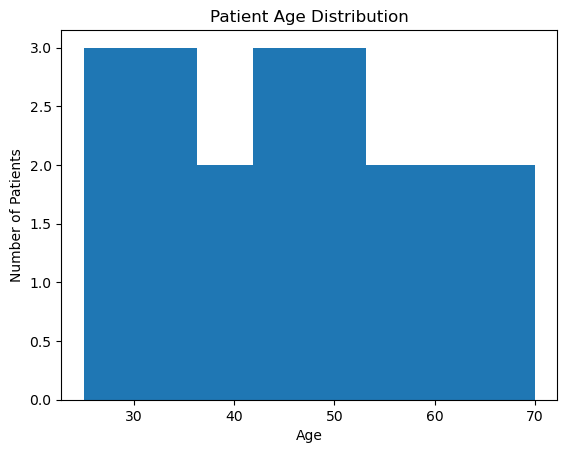

In [ ]:
#Age Distribution Visualization 

plt.figure()
plt.hist(patients['Age'], bins=8)
plt.title('Patient Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()


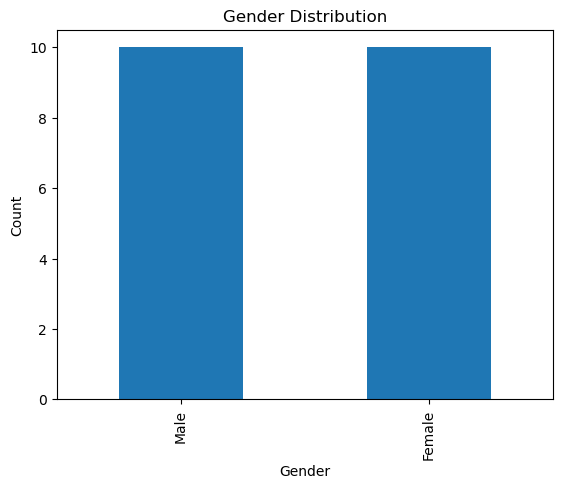

In [59]:
#Gender Distribution 

patients['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


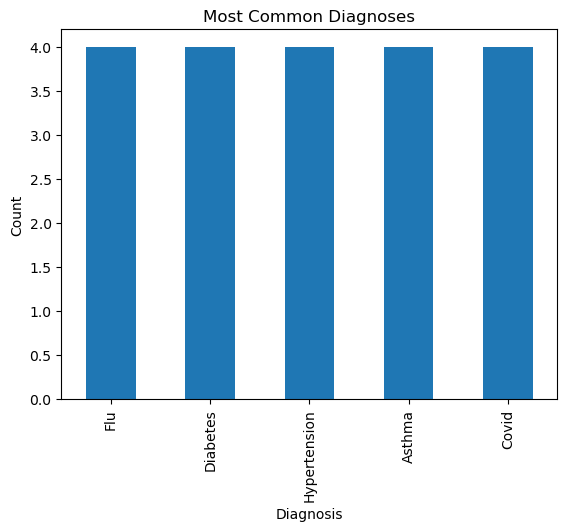

In [67]:
#Diagnosis Frequency 

patients['Diagnosis'].value_counts().plot(kind='bar')
plt.title('Most Common Diagnoses')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()


In [68]:
#Length of stay 

patients.groupby('Diagnosis')['Length_of_Stay'].mean()


Diagnosis
Asthma           3.0
Covid           10.0
Diabetes         5.0
Flu              4.0
Hypertension     6.0
Name: Length_of_Stay, dtype: float64

In [60]:
#Treatment Outcomes Analysis 

treatments['Treatment_Success'].value_counts()


Treatment_Success
Yes    16
No      4
Name: count, dtype: int64

In [1]:
#Treatment Cost Analysis 

treatments.groupby('Treatment_Type')['Treatment_Cost'].mean()


NameError: name 'treatments' is not defined

In [63]:
#Hospital Performance Metrics 

hospital.describe()


,Hospital_ID,Bed_Occupancy_Rate,Average_Stay_Days,Readmission_Rate,Patient_Satisfaction_Score
count,6.000000,6.000000,6.00000,6.000000,6.000000
mean,1.500000,78.833333,6.30000,13.666667,4.050000
std,0.547723,10.303721,2.05621,4.501851,0.308221
min,1.000000,65.000000,4.00000,9.000000,3.600000
25%,1.000000,71.250000,4.70000,10.250000,3.850000
50%,1.500000,80.000000,6.00000,12.500000,4.100000
75%,2.000000,87.250000,7.82500,17.000000,4.275000
max,2.000000,90.000000,9.10000,20.000000,4.400000


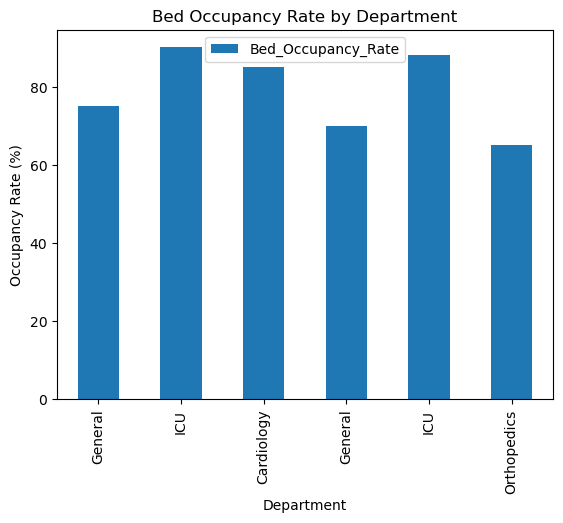

In [64]:
hospital.plot(x='Department', y='Bed_Occupancy_Rate', kind='bar')
plt.title('Bed Occupancy Rate by Department')
plt.xlabel('Department')
plt.ylabel('Occupancy Rate (%)')
plt.show()


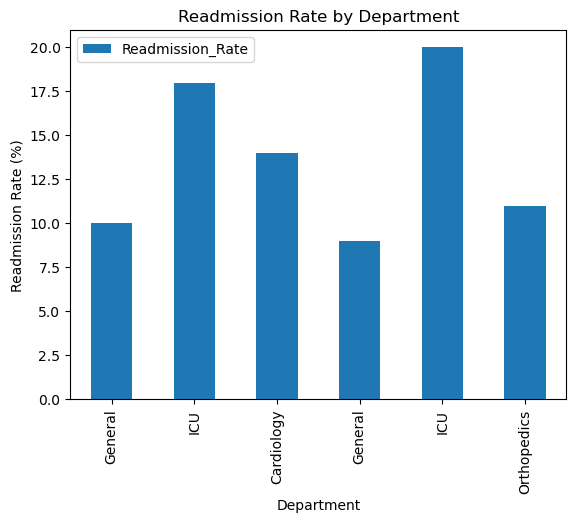

In [65]:
hospital.plot(x='Department', y='Readmission_Rate', kind='bar')
plt.title('Readmission Rate by Department')
plt.xlabel('Department')
plt.ylabel('Readmission Rate (%)')
plt.show()


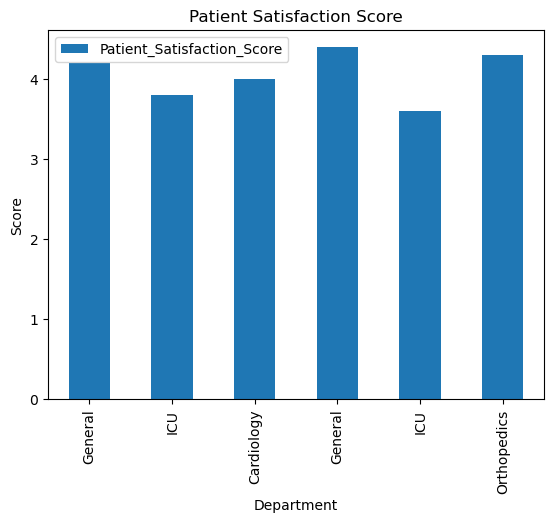

In [66]:
hospital.plot(x='Department', y='Patient_Satisfaction_Score', kind='bar')
plt.title('Patient Satisfaction Score')
plt.xlabel('Department')
plt.ylabel('Score')
plt.show()
